# Modules

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, Activation, MaxPool2D, InputLayer
from keras.layers.normalization import BatchNormalization
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
import datetime
from sklearn.utils import shuffle
import random

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Preprocessing

The preprocessing can may take some time till the data is downloaded and then converted into tensors

In [2]:
def zero_one(y_pred, y_true):
  
  y_hat = []
  y_t = []
  for i in range(len(y_pred)):
      y_hat.append(np.argmax(y_pred[i]))
      y_t.append(np.argmax(y_true[i]))

   
  loss = []
  for i in range(len(y_pred)):
      if(y_hat[i] == y_t[i]):
          loss.append(0)
      else:
          loss.append(1)


  return np.mean(loss)

In [3]:
def one_hot(train, test):
  one_hot_train = tf.one_hot(train, depth = 10)
  #one_hot_test = one_hot_test = tf.keras.utils.to_categorical(test)
  one_hot_test = tf.one_hot(test, depth = 10)
  return one_hot_train, one_hot_test

def load_data(url):
  with np.load(url) as data:
    X = data['X']
    y = data['y']
  return X, y

In [4]:
tf.random.set_seed(42)
random.seed(0)
np.random.seed(0)

In [5]:
X_train, y_train = load_data('/content/drive/My Drive/Data/fruits_10_training/Final Data/train_set.npz')
X_test, y_test = load_data('/content/drive/My Drive/Data/fruits_10_training/Final Data/test_set.npz')

print("Downloaded")

X_train, y_train = shuffle(X_train, y_train, random_state = 42)
X_test, y_test = shuffle(X_test, y_test, random_state = 42)

print("Shuffled")

y_train, y_test = one_hot(y_train, y_test)

print("Encoded")

X_train = tf.constant(X_train)
X_test = tf.constant(X_test)

print("Created tensors")

X_train = tf.cast(X_train, tf.float32) / 255.0
X_test = tf.cast(X_test, tf.float32) / 255.0

print("Normalized")

X_train = tf.image.resize(X_train, (64, 64))
X_test = tf.image.resize(X_test, (64, 64))

print("Rescaled")

Downloaded
Shuffled
Encoded
Created tensors
Normalized
Rescaled


In [ ]:
len(X_train), len(X_test)

(32607, 10906)

In [ ]:
X_numpy, y_numpy = load_data('/content/drive/My Drive/Data/fruits_10_training/Final Data/train_set.npz')


In [ ]:
unique, counts = np.unique(y_numpy, return_counts=True)
dict(zip(unique, counts))

{0: 6404,
 1: 5037,
 2: 1803,
 3: 1767,
 4: 3444,
 5: 1430,
 6: 3419,
 7: 2478,
 8: 5103,
 9: 1722}

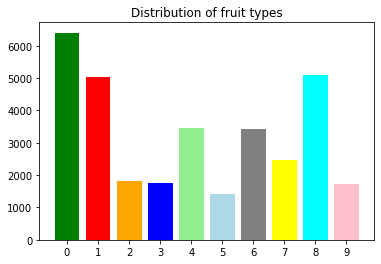

In [ ]:
y_pos = np.arange(len(unique))
plt.title('Distribution of fruit types')
plt.bar(unique, counts, color = ['green', 'red', 'orange', 
                                 'blue', 'lightgreen', 'lightblue', 
                                 'grey', 'yellow', 'cyan', 'pink'])
plt.xticks(y_pos, unique)
plt.show()


# Alexnet

In [6]:
tf.keras.backend.clear_session()
fruit_net = Sequential()
fruit_net.add(InputLayer(input_shape= (64,64,3)))

fruit_net.add(Conv2D(filters = 16, kernel_size= 5, strides = 1, padding= 'same', activation= 'relu'))
fruit_net.add(MaxPool2D(pool_size=2, strides=2))

fruit_net.add(Conv2D(filters= 32, kernel_size= 5, padding='same', activation= 'relu'))
fruit_net.add(MaxPool2D(pool_size=2, strides=2))

fruit_net.add(Conv2D(filters= 64, kernel_size= 5, padding='same', activation= 'relu'))
fruit_net.add(Conv2D(filters= 128, kernel_size= 5, padding='same', activation= 'relu'))
#fruit_net.add(Conv2D(filters= 4, kernel_size= 1, padding='same', activation= 'relu'))
fruit_net.add(MaxPool2D(pool_size=3, strides=2))

fruit_net.add(Flatten())
fruit_net.add(Dense(128, activation= tf.keras.activations.relu))
fruit_net.add(Dropout(0.5))
fruit_net.add(Dense(128, activation= tf.keras.activations.relu))
fruit_net.add(Dropout(0.5))
fruit_net.add(Dense(10, activation= 'softmax'))


In [7]:
fruit_net.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        51264     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       204928    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0

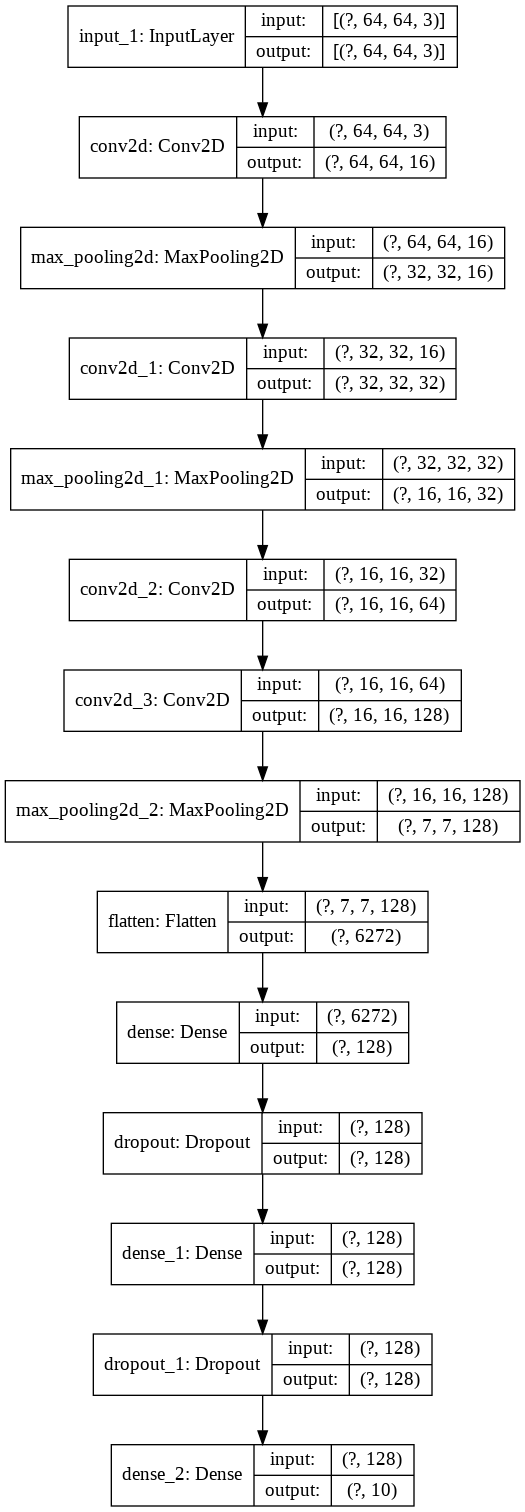

In [8]:
tf.keras.utils.plot_model(fruit_net,to_file='fruitnet.png', show_shapes=True, show_layer_names=True,)

In [ ]:
fruit_net.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])
  
fruit_net_result = fruit_net.fit(X_train, y_train, epochs=10, validation_split = 0.2, validation_data= (X_train, y_train))

Epoch 1/10
816/816 [==============================] - 7s 9ms/step - loss: 1.1621 - accuracy: 0.5773 - val_loss: 0.2097 - val_accuracy: 0.9281
Epoch 2/10
816/816 [==============================] - 6s 8ms/step - loss: 0.2575 - accuracy: 0.9155 - val_loss: 0.0234 - val_accuracy: 0.9939
Epoch 3/10
816/816 [==============================] - 6s 8ms/step - loss: 0.1260 - accuracy: 0.9609 - val_loss: 0.0142 - val_accuracy: 0.9965
Epoch 4/10
816/816 [==============================] - 6s 8ms/step - loss: 0.0832 - accuracy: 0.9757 - val_loss: 0.0146 - val_accuracy: 0.9952
Epoch 5/10
816/816 [==============================] - 6s 8ms/step - loss: 0.0869 - accuracy: 0.9748 - val_loss: 0.0142 - val_accuracy: 0.9946
Epoch 6/10
816/816 [==============================] - 7s 8ms/step - loss: 0.0805 - accuracy: 0.9788 - val_loss: 0.0047 - val_accuracy: 0.9992
Epoch 7/10
816/816 [==============================] - 7s 9ms/step - loss: 0.0459 - accuracy: 0.9871 - val_loss: 5.3429e-04 - val_accuracy: 0.9998
Ep

In [ ]:
y_pred = fruit_net.predict(X_test)
y_hat = y_test.numpy()
loss = zero_one(y_pred, y_hat)

In [ ]:
np.round(loss, decimals = 4)

0.0221

In [ ]:
# Training and validation accuracy (mean)

In [ ]:
acc_fruit_net = np.round(np.mean(fruit_net_result.history['accuracy']), decimals = 4)
val_acc_fruit_net = np.round(np.mean(fruit_net_result.history['val_accuracy']), decimals = 4)
acc_fruit_net, val_acc_fruit_net

(0.9334, 0.9902)

In [ ]:
plt.title("Accuracy on training set")
plt.grid()
plt.plot(fruit_net_result.history['accuracy'], 'o-', color = 'blue', label = 'Accuracy')
plt.plot(fruit_net_result.history['val_accuracy'], 'o-', color = 'orange', label = 'Validation Accuracy')
plt.legend()
plt.xlabel('Epoche')
plt.ylabel("Accuracy")
plt.show()

In [ ]:
tf.keras.utils.plot_model(fruit_net,to_file='simple_alexnet.png', show_shapes=True, show_layer_names=True,)

## Batch normalization

In [ ]:
tf.keras.backend.clear_session()
fruit_net_2 = Sequential()
fruit_net_2.add(InputLayer(input_shape= (64,64,3)))

fruit_net_2.add(Conv2D(filters = 16, kernel_size= 5, strides = 1, padding= 'same'))
fruit_net_2.add(BatchNormalization())
fruit_net_2.add(Activation('relu'))
fruit_net_2.add(MaxPool2D(pool_size=2, strides=2))
fruit_net_2.add(Dropout(0.2))

fruit_net_2.add(Conv2D(filters= 32, kernel_size= 5, padding='same'))
fruit_net_2.add(BatchNormalization())
fruit_net_2.add(Activation('relu'))
fruit_net_2.add(MaxPool2D(pool_size=2, strides=2))
fruit_net_2.add(Dropout(0.2))

fruit_net_2.add(Conv2D(filters= 64, kernel_size= 5, padding='same'))
fruit_net_2.add(BatchNormalization())
fruit_net_2.add(Activation('relu'))
fruit_net_2.add(Conv2D(filters= 128, kernel_size= 5, padding='same'))
fruit_net_2.add(BatchNormalization())
fruit_net_2.add(Activation('relu'))
fruit_net_2.add(MaxPool2D(pool_size=3, strides=2))
fruit_net_2.add(Dropout(0.2))

fruit_net_2.add(Flatten())
fruit_net_2.add(Dense(128, activation= tf.keras.activations.relu))
fruit_net_2.add(Dropout(0.5))
fruit_net_2.add(Dense(128, activation= tf.keras.activations.relu))
fruit_net_2.add(Dropout(0.5))
fruit_net_2.add(Dense(10, activation= 'softmax'))

In [ ]:
fruit_net_2.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])
  
fruit_net_2_result = fruit_net_2.fit(X_train, y_train, epochs=10, validation_split = 0.2, validation_data= (X_train, y_train))

Epoch 1/10
816/816 [==============================] - 8s 10ms/step - loss: 2.0191 - accuracy: 0.2717 - val_loss: 1.7161 - val_accuracy: 0.3916
Epoch 2/10
816/816 [==============================] - 7s 9ms/step - loss: 1.7667 - accuracy: 0.3355 - val_loss: 1.4506 - val_accuracy: 0.4588
Epoch 3/10
816/816 [==============================] - 8s 9ms/step - loss: 1.6304 - accuracy: 0.3728 - val_loss: 1.4210 - val_accuracy: 0.4891
Epoch 4/10
816/816 [==============================] - 8s 9ms/step - loss: 1.5473 - accuracy: 0.4033 - val_loss: 1.2788 - val_accuracy: 0.5465
Epoch 5/10
816/816 [==============================] - 8s 10ms/step - loss: 1.4968 - accuracy: 0.4200 - val_loss: 1.2204 - val_accuracy: 0.5761
Epoch 6/10
816/816 [==============================] - 8s 10ms/step - loss: 1.4457 - accuracy: 0.4297 - val_loss: 1.1942 - val_accuracy: 0.5894
Epoch 7/10
816/816 [==============================] - 8s 10ms/step - loss: 1.4209 - accuracy: 0.4440 - val_loss: 1.0984 - val_accuracy: 0.6040
Ep

In [ ]:
y_pred = fruit_net_2.predict(X_test)
y_hat = y_test.numpy()
loss = zero_one(y_pred, y_hat)
np.round(loss, decimals = 4)

0.4328

In [ ]:
acc_fruit_net = np.round(np.mean(fruit_net_2_result.history['accuracy']), decimals = 4)
val_acc_fruit_net = np.round(np.mean(fruit_net_2_result.history['val_accuracy']), decimals = 4)
acc_fruit_net, val_acc_fruit_net

(0.4233, 0.5406)

### Comparison fruitnet

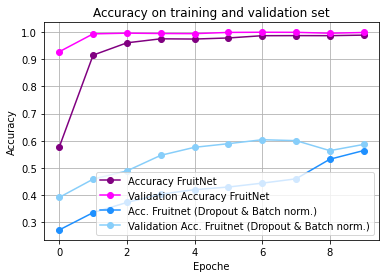

In [ ]:
plt.title("Accuracy on training and validation set")
plt.grid()
plt.plot(fruit_net_result.history['accuracy'], 'o-', color = 'purple', label = 'Accuracy FruitNet')
plt.plot(fruit_net_result.history['val_accuracy'], 'o-', color = 'magenta', label = 'Validation Accuracy FruitNet')
plt.plot(fruit_net_2_result.history['accuracy'], 'o-', color = 'dodgerblue', label = 'Acc. Fruitnet (Dropout & Batch norm.)')
plt.plot(fruit_net_2_result.history['val_accuracy'], 'o-', color = 'lightskyblue', label = 'Validation Acc. Fruitnet (Dropout & Batch norm.)')
plt.legend()
plt.xlabel('Epoche')
plt.ylabel("Accuracy")
plt.show()

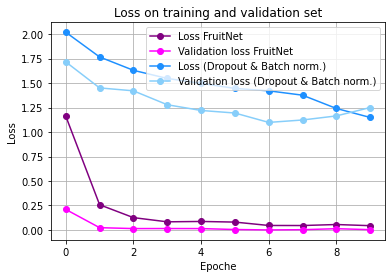

In [ ]:
plt.title("Loss on training and validation set")
plt.grid()
plt.plot(fruit_net_result.history['loss'], 'o-', color = 'purple', label = 'Loss FruitNet')
plt.plot(fruit_net_result.history['val_loss'], 'o-', color = 'magenta', label = 'Validation loss FruitNet')
plt.plot(fruit_net_2_result.history['loss'], 'o-', color = 'dodgerblue', label = 'Loss (Dropout & Batch norm.)')
plt.plot(fruit_net_2_result.history['val_loss'], 'o-', color = 'lightskyblue', label = 'Validation loss (Dropout & Batch norm.)')
plt.legend()
plt.xlabel('Epoche')
plt.ylabel("Loss")
plt.show()

# VGG based

### VGG_3

In [9]:
tf.keras.backend.clear_session()
vgg_3 = Sequential()
vgg_3.add(InputLayer(input_shape= (64,64,3)))

vgg_3.add(Conv2D(filters = 32, kernel_size= 3, strides = 1, padding= 'same', activation= 'relu'))
vgg_3.add(Conv2D(filters = 32, kernel_size= 3, strides = 1, padding= 'same', activation= 'relu'))
vgg_3.add(MaxPool2D(pool_size=2, strides=2))


vgg_3.add(Conv2D(filters = 64, kernel_size= 3, strides = 1, padding= 'same', activation= 'relu'))
vgg_3.add(Conv2D(filters = 64, kernel_size= 3, strides = 1, padding= 'same', activation= 'relu'))
vgg_3.add(MaxPool2D(pool_size=2, strides=2))


vgg_3.add(Conv2D(filters = 128, kernel_size= 3, strides = 1, padding= 'same', activation= 'relu'))
vgg_3.add(Conv2D(filters = 128, kernel_size= 3, strides = 1, padding= 'same', activation= 'relu'))
vgg_3.add(MaxPool2D(pool_size=2, strides=2))



vgg_3.add(Flatten())
vgg_3.add(Dense(128, activation='relu'))

vgg_3.add(Dense(128, activation='relu'))

vgg_3.add(Dense(10, activation= 'softmax'))

In [10]:
vgg_3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       7

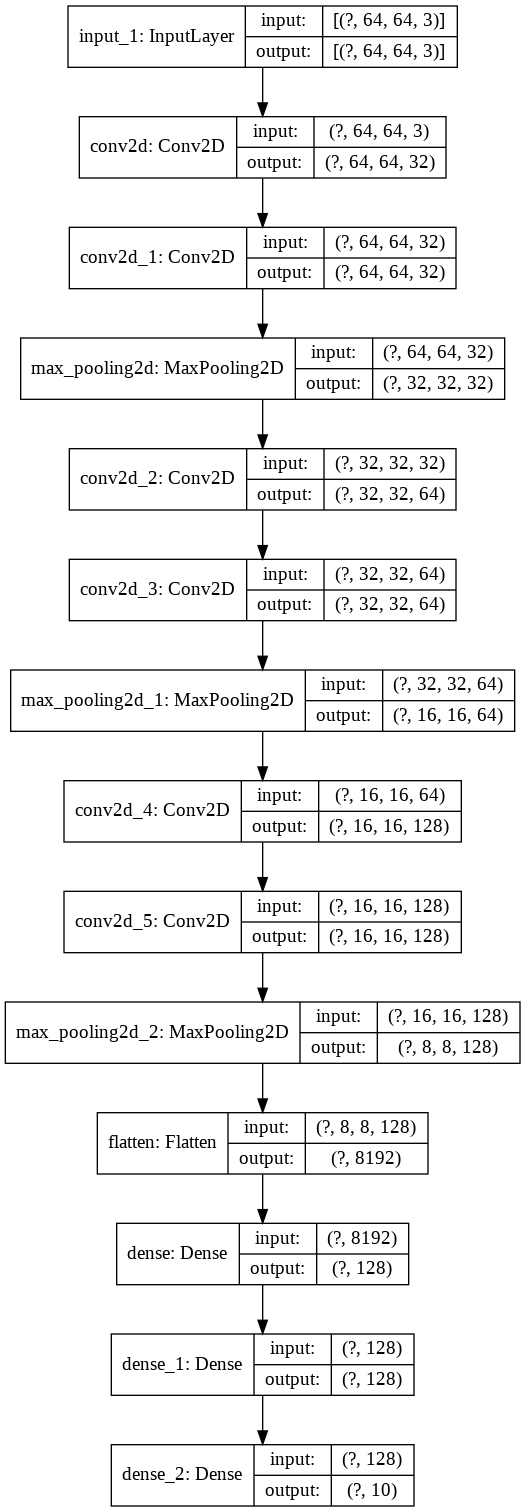

In [11]:
tf.keras.utils.plot_model(vgg_3,to_file='vgg.png', show_shapes=True, show_layer_names=True,)

In [ ]:
vgg_3.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])
  
vgg_3_result = vgg_3.fit(X_train, y_train, epochs=10, validation_split = 0.2, validation_data= (X_train, y_train))

Epoch 1/10
816/816 [==============================] - 11s 13ms/step - loss: 0.3228 - accuracy: 0.8914 - val_loss: 0.0156 - val_accuracy: 0.9959
Epoch 2/10
816/816 [==============================] - 10s 13ms/step - loss: 0.0339 - accuracy: 0.9893 - val_loss: 0.0106 - val_accuracy: 0.9957
Epoch 3/10
816/816 [==============================] - 10s 13ms/step - loss: 0.0544 - accuracy: 0.9842 - val_loss: 0.0020 - val_accuracy: 0.9995
Epoch 4/10
816/816 [==============================] - 10s 13ms/step - loss: 0.0135 - accuracy: 0.9960 - val_loss: 3.5478e-04 - val_accuracy: 1.0000
Epoch 5/10
816/816 [==============================] - 10s 13ms/step - loss: 6.0374e-05 - accuracy: 1.0000 - val_loss: 1.3777e-04 - val_accuracy: 1.0000
Epoch 6/10
816/816 [==============================] - 10s 13ms/step - loss: 7.8166e-06 - accuracy: 1.0000 - val_loss: 2.3766e-05 - val_accuracy: 1.0000
Epoch 7/10
816/816 [==============================] - 10s 13ms/step - loss: 3.5526e-06 - accuracy: 1.0000 - val_loss

In [ ]:
y_pred = vgg_3.predict(X_test)
y_hat = y_test.numpy()
loss = zero_one(y_pred, y_hat)
np.round(loss, decimals = 4)

0.0107

In [ ]:
acc_vgg_3 = np.round(np.mean(vgg_3_result.history['accuracy']), decimals = 4)
val_acc_vgg_3 = np.round(np.mean(vgg_3_result.history['val_accuracy']), decimals = 4)
acc_vgg_3, val_acc_vgg_3

(0.9861, 0.9991)

#### VGG_3 dropout / batch normalization

In [ ]:
tf.keras.backend.clear_session()
vgg_3_2 = Sequential()
vgg_3_2.add(InputLayer(input_shape= (64,64,3)))

vgg_3_2.add(Conv2D(filters = 32, kernel_size= 3, strides = 1, padding= 'same'))
vgg_3_2.add(BatchNormalization())
vgg_3_2.add(Activation('relu'))
vgg_3_2.add(Conv2D(filters = 32, kernel_size= 3, strides = 1, padding= 'same'))
vgg_3_2.add(BatchNormalization())
vgg_3_2.add(Activation('relu'))
vgg_3_2.add(MaxPool2D(pool_size=2, strides=2))
vgg_3_2.add(Dropout(0.2))

vgg_3_2.add(Conv2D(filters = 64, kernel_size= 3, strides = 1, padding= 'same'))
vgg_3_2.add(BatchNormalization())
vgg_3_2.add(Activation('relu'))
vgg_3_2.add(Conv2D(filters = 64, kernel_size= 3, strides = 1, padding= 'same'))
vgg_3_2.add(BatchNormalization())
vgg_3_2.add(Activation('relu'))
vgg_3_2.add(MaxPool2D(pool_size=2, strides=2))
vgg_3_2.add(Dropout(0.2))

vgg_3_2.add(Conv2D(filters = 128, kernel_size= 3, strides = 1, padding= 'same'))
vgg_3_2.add(BatchNormalization())
vgg_3_2.add(Activation('relu'))
vgg_3_2.add(Conv2D(filters = 128, kernel_size= 3, strides = 1, padding= 'same'))
vgg_3_2.add(BatchNormalization())
vgg_3_2.add(Activation('relu'))
vgg_3_2.add(MaxPool2D(pool_size=2, strides=2))
vgg_3_2.add(Dropout(0.2))


vgg_3_2.add(Flatten())
vgg_3_2.add(Dense(128, activation='relu'))
vgg_3_2.add(Dropout(0.2))
vgg_3_2.add(Dense(128, activation='relu'))
vgg_3_2.add(Dropout(0.2))
vgg_3_2.add(Dense(10, activation= 'softmax'))

In [ ]:
vgg_3_2.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])
  
vgg_3_2_result = vgg_3_2.fit(X_train, y_train, epochs=10, validation_split = 0.2, validation_data= (X_train, y_train))

Epoch 1/10
816/816 [==============================] - 14s 17ms/step - loss: 0.7551 - accuracy: 0.7454 - val_loss: 0.1584 - val_accuracy: 0.9488
Epoch 2/10
816/816 [==============================] - 14s 17ms/step - loss: 0.1979 - accuracy: 0.9322 - val_loss: 0.0623 - val_accuracy: 0.9816
Epoch 3/10
816/816 [==============================] - 14s 17ms/step - loss: 0.1275 - accuracy: 0.9588 - val_loss: 0.0269 - val_accuracy: 0.9939
Epoch 4/10
816/816 [==============================] - 14s 17ms/step - loss: 0.0942 - accuracy: 0.9688 - val_loss: 0.1988 - val_accuracy: 0.9331
Epoch 5/10
816/816 [==============================] - 14s 17ms/step - loss: 0.0888 - accuracy: 0.9727 - val_loss: 0.0104 - val_accuracy: 0.9965
Epoch 6/10
816/816 [==============================] - 14s 17ms/step - loss: 0.0615 - accuracy: 0.9819 - val_loss: 0.4917 - val_accuracy: 0.8836
Epoch 7/10
816/816 [==============================] - 14s 17ms/step - loss: 0.0686 - accuracy: 0.9797 - val_loss: 0.0014 - val_accuracy:

In [ ]:
y_pred = vgg_3_2.predict(X_test)
y_hat = y_test.numpy()
loss = zero_one(y_pred, y_hat)
np.round(loss, decimals = 4)

0.0023

In [ ]:
acc_vgg_3 = np.round(np.mean(vgg_3_2_result.history['accuracy']), decimals = 4)
val_acc_vgg_3 = np.round(np.mean(vgg_3_2_result.history['val_accuracy']), decimals = 4)
acc_vgg_3, val_acc_vgg_3

(0.9492, 0.9736)

### Comparison VGG 3

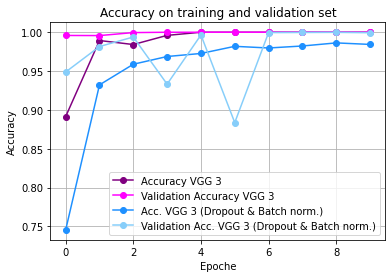

In [ ]:
plt.title("Accuracy on training and validation set")
plt.grid()
plt.plot(vgg_3_result.history['accuracy'], 'o-', color = 'purple', label = 'Accuracy VGG 3')
plt.plot(vgg_3_result.history['val_accuracy'], 'o-', color = 'magenta', label = 'Validation Accuracy VGG 3')
plt.plot(vgg_3_2_result.history['accuracy'], 'o-', color = 'dodgerblue', label = 'Acc. VGG 3 (Dropout & Batch norm.)')
plt.plot(vgg_3_2_result.history['val_accuracy'], 'o-', color = 'lightskyblue', label = 'Validation Acc. VGG 3 (Dropout & Batch norm.)')
plt.legend()
plt.xlabel('Epoche')
plt.ylabel("Accuracy")
plt.show()

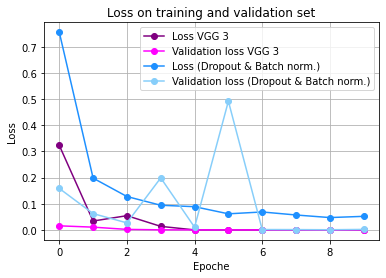

In [ ]:
plt.title("Loss on training and validation set")
plt.grid()
plt.plot(vgg_3_result.history['loss'], 'o-', color = 'purple', label = 'Loss VGG 3')
plt.plot(vgg_3_result.history['val_loss'], 'o-', color = 'magenta', label = 'Validation loss VGG 3')
plt.plot(vgg_3_2_result.history['loss'], 'o-', color = 'dodgerblue', label = 'Loss (Dropout & Batch norm.)')
plt.plot(vgg_3_2_result.history['val_loss'], 'o-', color = 'lightskyblue', label = 'Validation loss (Dropout & Batch norm.)')
plt.legend()
plt.xlabel('Epoche')
plt.ylabel("Loss")
plt.show()

## VGG_4

In [ ]:
tf.keras.backend.clear_session()
vgg_4 = Sequential()
vgg_4.add(InputLayer(input_shape= (64,64,3)))

vgg_4.add(Conv2D(filters = 32, kernel_size= 3, strides = 1, padding= 'same', activation= 'relu'))
vgg_4.add(Conv2D(filters = 32, kernel_size= 3, strides = 1, padding= 'same', activation= 'relu'))
vgg_4.add(MaxPool2D(pool_size=2, strides=2))

vgg_4.add(Conv2D(filters = 64, kernel_size= 3, strides = 1, padding= 'same', activation= 'relu'))
vgg_4.add(Conv2D(filters = 64, kernel_size= 3, strides = 1, padding= 'same', activation= 'relu'))
vgg_4.add(MaxPool2D(pool_size=2, strides=2))

vgg_4.add(Conv2D(filters = 128, kernel_size= 3, strides = 1, padding= 'same', activation= 'relu'))
vgg_4.add(Conv2D(filters = 128, kernel_size= 3, strides = 1, padding= 'same', activation= 'relu'))
vgg_4.add(MaxPool2D(pool_size=2, strides=2))

vgg_4.add(Conv2D(filters = 256, kernel_size= 3, strides = 1, padding= 'same', activation= 'relu'))
vgg_4.add(Conv2D(filters = 256, kernel_size= 3, strides = 1, padding= 'same', activation= 'relu'))
vgg_4.add(MaxPool2D(pool_size=2, strides=2))


vgg_4.add(Flatten())
vgg_4.add(Dense(128, activation='relu'))

vgg_4.add(Dense(128, activation='relu'))

vgg_4.add(Dense(10, activation= 'softmax'))

In [ ]:
vgg_4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       7

In [ ]:
vgg_4.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])
  
vgg_4_result = vgg_4.fit(X_train, y_train, epochs=10, validation_split = 0.2, validation_data= (X_train, y_train))

Epoch 1/10
816/816 [==============================] - 12s 15ms/step - loss: 0.6284 - accuracy: 0.7755 - val_loss: 0.2691 - val_accuracy: 0.9146
Epoch 2/10
816/816 [==============================] - 12s 14ms/step - loss: 0.0986 - accuracy: 0.9694 - val_loss: 0.0431 - val_accuracy: 0.9860
Epoch 3/10
816/816 [==============================] - 12s 14ms/step - loss: 0.0497 - accuracy: 0.9839 - val_loss: 0.3984 - val_accuracy: 0.8850
Epoch 4/10
816/816 [==============================] - 12s 14ms/step - loss: 0.0296 - accuracy: 0.9907 - val_loss: 2.6781e-04 - val_accuracy: 1.0000
Epoch 5/10
816/816 [==============================] - 11s 14ms/step - loss: 7.5808e-05 - accuracy: 1.0000 - val_loss: 5.1254e-05 - val_accuracy: 1.0000
Epoch 6/10
816/816 [==============================] - 11s 14ms/step - loss: 1.1479e-05 - accuracy: 1.0000 - val_loss: 7.0527e-06 - val_accuracy: 1.0000
Epoch 7/10
816/816 [==============================] - 12s 14ms/step - loss: 3.4989e-06 - accuracy: 1.0000 - val_loss

In [ ]:
y_pred = vgg_4.predict(X_test)
y_hat = y_test.numpy()
loss = zero_one(y_pred, y_hat)
np.round(loss, decimals = 4)

0.0193

In [ ]:
acc_vgg_4 = np.round(np.mean(vgg_4_result.history['accuracy']), decimals = 4)
val_acc_vgg_4 = np.round(np.mean(vgg_4_result.history['val_accuracy']), decimals = 4)
acc_vgg_4, val_acc_vgg_4

(0.9719, 0.9786)

### VGG_4 dropout / batch normalization


In [ ]:
tf.keras.backend.clear_session()
vgg_4_2 = Sequential()
vgg_4_2.add(InputLayer(input_shape= (64,64,3)))

vgg_4_2.add(Conv2D(filters = 32, kernel_size= 3, strides = 1, padding= 'same'))
vgg_4_2.add(BatchNormalization())
vgg_4_2.add(Activation('relu'))
vgg_4_2.add(Conv2D(filters = 32, kernel_size= 3, strides = 1, padding= 'same'))
vgg_4_2.add(BatchNormalization())
vgg_4_2.add(Activation('relu'))
vgg_4_2.add(MaxPool2D(pool_size=2, strides=2))
vgg_4_2.add(Dropout(0.2))

vgg_4_2.add(Conv2D(filters = 64, kernel_size= 3, strides = 1, padding= 'same'))
vgg_4_2.add(BatchNormalization())
vgg_4_2.add(Activation('relu'))
vgg_4_2.add(Conv2D(filters = 64, kernel_size= 3, strides = 1, padding= 'same'))
vgg_4_2.add(BatchNormalization())
vgg_4_2.add(Activation('relu'))
vgg_4_2.add(MaxPool2D(pool_size=2, strides=2))
vgg_4_2.add(Dropout(0.2))

vgg_4_2.add(Conv2D(filters = 128, kernel_size= 3, strides = 1, padding= 'same'))
vgg_4_2.add(BatchNormalization())
vgg_4_2.add(Activation('relu'))
vgg_4_2.add(Conv2D(filters = 128, kernel_size= 3, strides = 1, padding= 'same'))
vgg_4_2.add(BatchNormalization())
vgg_4_2.add(Activation('relu'))
vgg_4_2.add(MaxPool2D(pool_size=2, strides=2))
vgg_4_2.add(Dropout(0.2))

vgg_4_2.add(Conv2D(filters = 256, kernel_size= 3, strides = 1, padding= 'same'))
vgg_4_2.add(BatchNormalization())
vgg_4_2.add(Activation('relu'))
vgg_4_2.add(Conv2D(filters = 256, kernel_size= 3, strides = 1, padding= 'same'))
vgg_4_2.add(BatchNormalization())
vgg_4_2.add(Activation('relu'))
vgg_4_2.add(MaxPool2D(pool_size=2, strides=2))
vgg_4_2.add(Dropout(0.2))


vgg_4_2.add(Flatten())
vgg_4_2.add(Dense(128, activation='relu'))
vgg_4_2.add(Dropout(0.2))
vgg_4_2.add(Dense(128, activation='relu'))
vgg_4_2.add(Dropout(0.2))
vgg_4_2.add(Dense(10, activation= 'softmax'))

In [ ]:
vgg_4_2.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])
  
vgg_4_2_result = vgg_4_2.fit(X_train, y_train, epochs=10, validation_split = 0.2, validation_data= (X_train, y_train))

Epoch 1/10
816/816 [==============================] - 16s 19ms/step - loss: 0.8209 - accuracy: 0.7079 - val_loss: 1.1756 - val_accuracy: 0.6624
Epoch 2/10
816/816 [==============================] - 16s 19ms/step - loss: 0.2396 - accuracy: 0.9214 - val_loss: 0.0143 - val_accuracy: 0.9969
Epoch 3/10
816/816 [==============================] - 16s 19ms/step - loss: 0.1486 - accuracy: 0.9525 - val_loss: 0.0161 - val_accuracy: 0.9948
Epoch 4/10
816/816 [==============================] - 15s 19ms/step - loss: 0.1120 - accuracy: 0.9630 - val_loss: 0.1741 - val_accuracy: 0.9637
Epoch 5/10
816/816 [==============================] - 15s 19ms/step - loss: 0.1366 - accuracy: 0.9573 - val_loss: 0.0027 - val_accuracy: 0.9998
Epoch 6/10
816/816 [==============================] - 16s 19ms/step - loss: 0.0843 - accuracy: 0.9737 - val_loss: 1.1740 - val_accuracy: 0.8025
Epoch 7/10
816/816 [==============================] - 16s 19ms/step - loss: 0.0829 - accuracy: 0.9742 - val_loss: 0.0035 - val_accuracy:

In [ ]:
y_pred = vgg_4_2.predict(X_test)
y_hat = y_test.numpy()
loss = zero_one(y_pred, y_hat)
np.round(loss, decimals = 4)

0.0072

In [ ]:
acc_vgg_4 = np.round(np.mean(vgg_4_2_result.history['accuracy']), decimals = 4)
val_acc_vgg_4 = np.round(np.mean(vgg_4_2_result.history['val_accuracy']), decimals = 4)
acc_vgg_4, val_acc_vgg_4

(0.9391, 0.9276)

## Compariosn VGG 4

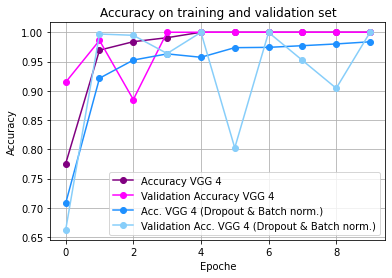

In [ ]:
plt.title("Accuracy on training and validation set")
plt.grid()
plt.plot(vgg_4_result.history['accuracy'], 'o-', color = 'purple', label = 'Accuracy VGG 4')
plt.plot(vgg_4_result.history['val_accuracy'], 'o-', color = 'magenta', label = 'Validation Accuracy VGG 4')
plt.plot(vgg_4_2_result.history['accuracy'], 'o-', color = 'dodgerblue', label = 'Acc. VGG 4 (Dropout & Batch norm.)')
plt.plot(vgg_4_2_result.history['val_accuracy'], 'o-', color = 'lightskyblue', label = 'Validation Acc. VGG 4 (Dropout & Batch norm.)')
plt.legend()
plt.xlabel('Epoche')
plt.ylabel("Accuracy")
plt.show()

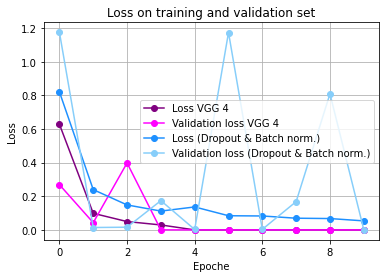

In [ ]:
plt.title("Loss on training and validation set")
plt.grid()
plt.plot(vgg_4_result.history['loss'], 'o-', color = 'purple', label = 'Loss VGG 4')
plt.plot(vgg_4_result.history['val_loss'], 'o-', color = 'magenta', label = 'Validation loss VGG 4')
plt.plot(vgg_4_2_result.history['loss'], 'o-', color = 'dodgerblue', label = 'Loss (Dropout & Batch norm.)')
plt.plot(vgg_4_2_result.history['val_loss'], 'o-', color = 'lightskyblue', label = 'Validation loss (Dropout & Batch norm.)')
plt.legend()
plt.xlabel('Epoche')
plt.ylabel("Loss")
plt.show()

## VGG_5

In [12]:
tf.keras.backend.clear_session()
vgg_5 = Sequential()
vgg_5.add(InputLayer(input_shape= (64,64,3)))

vgg_5.add(Conv2D(filters = 32, kernel_size= 3, strides = 1, padding= 'same', activation= 'relu'))
vgg_5.add(Conv2D(filters = 32, kernel_size= 3, strides = 1, padding= 'same', activation= 'relu'))
vgg_5.add(MaxPool2D(pool_size=2, strides=2))

vgg_5.add(Conv2D(filters = 64, kernel_size= 3, strides = 1, padding= 'same', activation= 'relu'))
vgg_5.add(Conv2D(filters = 64, kernel_size= 3, strides = 1, padding= 'same', activation= 'relu'))
vgg_5.add(MaxPool2D(pool_size=2, strides=2))

vgg_5.add(Conv2D(filters = 128, kernel_size= 3, strides = 1, padding= 'same', activation= 'relu'))
vgg_5.add(Conv2D(filters = 128, kernel_size= 3, strides = 1, padding= 'same', activation= 'relu'))
vgg_5.add(MaxPool2D(pool_size=2, strides=2))

vgg_5.add(Conv2D(filters = 256, kernel_size= 3, strides = 1, padding= 'same', activation= 'relu'))
vgg_5.add(Conv2D(filters = 256, kernel_size= 3, strides = 1, padding= 'same', activation= 'relu'))
vgg_5.add(MaxPool2D(pool_size=2, strides=2))

vgg_5.add(Conv2D(filters = 512, kernel_size= 3, strides = 1, padding= 'same', activation= 'relu'))
vgg_5.add(Conv2D(filters = 512, kernel_size= 3, strides = 1, padding= 'same', activation= 'relu'))
vgg_5.add(MaxPool2D(pool_size=2, strides=2))


vgg_5.add(Flatten())
vgg_5.add(Dense(128, activation='relu'))

vgg_5.add(Dense(128, activation='relu'))

vgg_5.add(Dense(10, activation= 'softmax'))

In [13]:
vgg_5.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       7

In [ ]:
vgg_5.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])
  
vgg_5_result = vgg_5.fit(X_train, y_train, epochs=10, validation_split = 0.2, validation_data= (X_train, y_train))

Epoch 1/10
816/816 [==============================] - 17s 21ms/step - loss: 0.8716 - accuracy: 0.6871 - val_loss: 0.1867 - val_accuracy: 0.9365
Epoch 2/10
816/816 [==============================] - 17s 20ms/step - loss: 0.1324 - accuracy: 0.9581 - val_loss: 0.0586 - val_accuracy: 0.9811
Epoch 3/10
816/816 [==============================] - 17s 20ms/step - loss: 0.0691 - accuracy: 0.9791 - val_loss: 0.0668 - val_accuracy: 0.9819
Epoch 4/10
816/816 [==============================] - 17s 21ms/step - loss: 0.0494 - accuracy: 0.9859 - val_loss: 0.0398 - val_accuracy: 0.9883
Epoch 5/10
816/816 [==============================] - 16s 20ms/step - loss: 0.0471 - accuracy: 0.9863 - val_loss: 0.0014 - val_accuracy: 0.9997
Epoch 6/10
816/816 [==============================] - 17s 20ms/step - loss: 0.0356 - accuracy: 0.9898 - val_loss: 0.0222 - val_accuracy: 0.9926
Epoch 7/10
816/816 [==============================] - 17s 20ms/step - loss: 0.0410 - accuracy: 0.9893 - val_loss: 0.0145 - val_accuracy:

In [ ]:
y_pred = vgg_5.predict(X_test)
y_hat = y_test.numpy()
loss = zero_one(y_pred, y_hat)
np.round(loss, decimals= 4)

0.0457

In [ ]:
acc_vgg_5 = np.round(np.mean(vgg_5_result.history['accuracy']), decimals = 4)
val_acc_vgg_5 = np.round(np.mean(vgg_5_result.history['val_accuracy']), decimals = 4)
acc_vgg_5, val_acc_vgg_5

(0.955, 0.9833)

### VGG_5 dropout / batch normalization

In [ ]:
tf.keras.backend.clear_session()
vgg_5_2 = Sequential()
vgg_5_2.add(InputLayer(input_shape= (64,64,3)))

vgg_5_2.add(Conv2D(filters = 32, kernel_size= 3, strides = 1, padding= 'same'))
vgg_5_2.add(BatchNormalization())
vgg_5_2.add(Activation('relu'))
vgg_5_2.add(Conv2D(filters = 32, kernel_size= 3, strides = 1, padding= 'same'))
vgg_5_2.add(BatchNormalization())
vgg_5_2.add(Activation('relu'))
vgg_5_2.add(MaxPool2D(pool_size=2, strides=2))
vgg_5_2.add(Dropout(0.2))

vgg_5_2.add(Conv2D(filters = 64, kernel_size= 3, strides = 1, padding= 'same'))
vgg_5_2.add(BatchNormalization())
vgg_5_2.add(Activation('relu'))
vgg_5_2.add(Conv2D(filters = 64, kernel_size= 3, strides = 1, padding= 'same'))
vgg_5_2.add(BatchNormalization())
vgg_5_2.add(Activation('relu'))
vgg_5_2.add(MaxPool2D(pool_size=2, strides=2))
vgg_5_2.add(Dropout(0.2))

vgg_5_2.add(Conv2D(filters = 128, kernel_size= 3, strides = 1, padding= 'same'))
vgg_5_2.add(BatchNormalization())
vgg_5_2.add(Activation('relu'))
vgg_5_2.add(Conv2D(filters = 128, kernel_size= 3, strides = 1, padding= 'same'))
vgg_5_2.add(BatchNormalization())
vgg_5_2.add(Activation('relu'))
vgg_5_2.add(MaxPool2D(pool_size=2, strides=2))
vgg_5_2.add(Dropout(0.2))

vgg_5_2.add(Conv2D(filters = 256, kernel_size= 3, strides = 1, padding= 'same'))
vgg_5_2.add(BatchNormalization())
vgg_5_2.add(Activation('relu'))
vgg_5_2.add(Conv2D(filters = 256, kernel_size= 3, strides = 1, padding= 'same'))
vgg_5_2.add(BatchNormalization())
vgg_5_2.add(Activation('relu'))
vgg_5_2.add(MaxPool2D(pool_size=2, strides=2))
vgg_5_2.add(Dropout(0.2))

vgg_5_2.add(Conv2D(filters = 512, kernel_size= 3, strides = 1, padding= 'same'))
vgg_5_2.add(BatchNormalization())
vgg_5_2.add(Activation('relu'))
vgg_5_2.add(Conv2D(filters = 512, kernel_size= 3, strides = 1, padding= 'same'))
vgg_5_2.add(BatchNormalization())
vgg_5_2.add(Activation('relu'))
vgg_5_2.add(MaxPool2D(pool_size=2, strides=2))
vgg_5_2.add(Dropout(0.2))


vgg_5_2.add(Flatten())
vgg_5_2.add(Dense(128, activation='relu'))
vgg_5_2.add(Dropout(0.2))
vgg_5_2.add(Dense(128, activation='relu'))
vgg_5_2.add(Dropout(0.2))
vgg_5_2.add(Dense(10, activation= 'softmax'))

In [ ]:
vgg_5_2.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])
  
vgg_5_2_result = vgg_5_2.fit(X_train, y_train, epochs=10, validation_split = 0.2, validation_data= (X_train, y_train))

Epoch 1/10
816/816 [==============================] - 21s 26ms/step - loss: 0.8577 - accuracy: 0.6999 - val_loss: 0.4788 - val_accuracy: 0.8451
Epoch 2/10
816/816 [==============================] - 21s 26ms/step - loss: 0.2440 - accuracy: 0.9218 - val_loss: 0.0317 - val_accuracy: 0.9920
Epoch 3/10
816/816 [==============================] - 21s 25ms/step - loss: 0.1319 - accuracy: 0.9597 - val_loss: 0.0146 - val_accuracy: 0.9956
Epoch 4/10
816/816 [==============================] - 21s 25ms/step - loss: 0.0932 - accuracy: 0.9730 - val_loss: 0.0660 - val_accuracy: 0.9753
Epoch 5/10
816/816 [==============================] - 21s 25ms/step - loss: 0.0853 - accuracy: 0.9763 - val_loss: 0.0662 - val_accuracy: 0.9839
Epoch 6/10
816/816 [==============================] - 21s 25ms/step - loss: 0.0639 - accuracy: 0.9823 - val_loss: 0.0370 - val_accuracy: 0.9879
Epoch 7/10
816/816 [==============================] - 21s 25ms/step - loss: 0.0724 - accuracy: 0.9805 - val_loss: 0.5454 - val_accuracy:

In [ ]:
y_pred = vgg_5_2.predict(X_test)
y_hat = y_test.numpy()
loss = zero_one(y_pred, y_hat)
np.round(loss, decimals= 4)

0.0044

In [ ]:
acc_vgg_5 = np.round(np.mean(vgg_5_2_result.history['accuracy']), decimals = 4)
val_acc_vgg_5 = np.round(np.mean(vgg_5_2_result.history['val_accuracy']), decimals = 4)
acc_vgg_5, val_acc_vgg_5

(0.9456, 0.9695)

### Comparison VGG 5

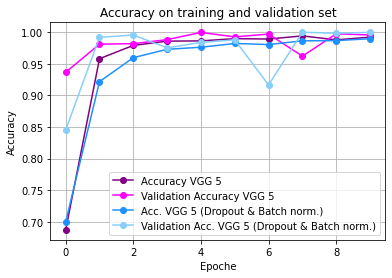

In [ ]:
plt.title("Accuracy on training and validation set")
plt.grid()
plt.plot(vgg_5_result.history['accuracy'], 'o-', color = 'purple', label = 'Accuracy VGG 5')
plt.plot(vgg_5_result.history['val_accuracy'], 'o-', color = 'magenta', label = 'Validation Accuracy VGG 5')
plt.plot(vgg_5_2_result.history['accuracy'], 'o-', color = 'dodgerblue', label = 'Acc. VGG 5 (Dropout & Batch norm.)')
plt.plot(vgg_5_2_result.history['val_accuracy'], 'o-', color = 'lightskyblue', label = 'Validation Acc. VGG 5 (Dropout & Batch norm.)')
plt.legend()
plt.xlabel('Epoche')
plt.ylabel("Accuracy")
plt.show()

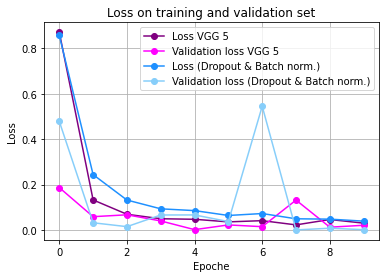

In [ ]:
plt.title("Loss on training and validation set")
plt.grid()
plt.plot(vgg_5_result.history['loss'], 'o-', color = 'purple', label = 'Loss VGG 5')
plt.plot(vgg_5_result.history['val_loss'], 'o-', color = 'magenta', label = 'Validation loss VGG 5')
plt.plot(vgg_5_2_result.history['loss'], 'o-', color = 'dodgerblue', label = 'Loss (Dropout & Batch norm.)')
plt.plot(vgg_5_2_result.history['val_loss'], 'o-', color = 'lightskyblue', label = 'Validation loss (Dropout & Batch norm.)')
plt.legend()
plt.xlabel('Epoche')
plt.ylabel("Loss")
plt.show()

# GoogLeNet

In [ ]:
def inception_module(x,
                     filters_1x1,
                     filters_3x3_reduce,
                     filters_3x3,
                     filters_5x5_reduce,
                     filters_5x5,
                     filters_pool_proj,
                     name=None):
    
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu')(x)
    
    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu')(conv_3x3)

    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_5x5 = Conv2D(filters_5x5, (5, 5), padding='same', activation='relu')(conv_5x5)

    pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu')(pool_proj)

    output = tf.keras.layers.concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3, name=name)
    
    return output

In [ ]:
kernel_init = keras.initializers.glorot_uniform()
bias_init = keras.initializers.Constant(value=0.2)

In [ ]:
tf.keras.backend.clear_session()
x_input = tf.keras.Input(shape=(64, 64, 3))
x = Conv2D(32, (5, 5), padding='same', strides=(2, 2), activation='relu', name='conv_1_5x5')(x_input)
                            #kernel_initializer=kernel_init, 
                            #bias_initializer=bias_init)(x_input)
x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_1_3x3/2')(x)                         
x = Conv2D(64, (1, 1), padding='same', strides=(2, 2), activation='relu', name='conv_2_1x1/3')(x)
#                            kernel_initializer=kernel_init, 
#                            bias_initializer=bias_init)(x)

x = inception_module(x,
                     filters_1x1=64,
                     filters_3x3_reduce=96,
                     filters_3x3=128,
                     filters_5x5_reduce=16,
                     filters_5x5=32,
                     filters_pool_proj=32,
                     name='inception_3a')

x = inception_module(x,
                      filters_1x1=256,
                      filters_3x3_reduce=128,
                      filters_3x3=128,
                      filters_5x5_reduce=64,
                      filters_5x5=64,
                      filters_pool_proj=32,
                      name='inception_3b')
x = AveragePooling2D((5, 5), strides=2)(x)
x = Conv2D(128, (1, 1), padding='same', activation='relu', name='conv_1_1x1')(x)

x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_1_3x3/3')(x)                        
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x)

In [ ]:
model = keras.Model(x_input, [x], name='inception_v1')

In [ ]:
model.summary()

Model: "inception_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv_1_5x5 (Conv2D)             (None, 32, 32, 32)   2432        input_1[0][0]                    
__________________________________________________________________________________________________
max_pool_1_3x3/2 (MaxPooling2D) (None, 16, 16, 32)   0           conv_1_5x5[0][0]                 
__________________________________________________________________________________________________
conv_2_1x1/3 (Conv2D)           (None, 8, 8, 64)     2112        max_pool_1_3x3/2[0][0]           
_______________________________________________________________________________________

In [ ]:
model.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])
  
interception_result = model.fit(X_train, y_train, epochs=10, validation_split = 0.2, validation_data= (X_train, y_train))

Epoch 1/10
816/816 [==============================] - 7s 8ms/step - loss: 0.9528 - accuracy: 0.6548 - val_loss: 0.2057 - val_accuracy: 0.9299
Epoch 2/10
816/816 [==============================] - 6s 8ms/step - loss: 0.1515 - accuracy: 0.9523 - val_loss: 0.0831 - val_accuracy: 0.9706
Epoch 3/10
816/816 [==============================] - 6s 8ms/step - loss: 0.0661 - accuracy: 0.9796 - val_loss: 0.0150 - val_accuracy: 0.9940
Epoch 4/10
816/816 [==============================] - 6s 8ms/step - loss: 0.0489 - accuracy: 0.9862 - val_loss: 0.1577 - val_accuracy: 0.9707
Epoch 5/10
816/816 [==============================] - 6s 8ms/step - loss: 0.0457 - accuracy: 0.9875 - val_loss: 0.0278 - val_accuracy: 0.9899
Epoch 6/10
816/816 [==============================] - 6s 8ms/step - loss: 0.0197 - accuracy: 0.9951 - val_loss: 0.0017 - val_accuracy: 0.9995
Epoch 7/10
816/816 [==============================] - 6s 8ms/step - loss: 0.0315 - accuracy: 0.9910 - val_loss: 5.3730e-04 - val_accuracy: 0.9997
Ep

In [ ]:
y_pred = model.predict(X_test)
y_hat = y_test.numpy()
loss = zero_one(y_pred, y_hat)
np.round(loss, decimals = 4)

0.0087

In [ ]:
acc_interception = np.round(np.mean(interception_result.history['accuracy']), decimals = 4)
val_acc_interception = np.round(np.mean(interception_result.history['val_accuracy']), decimals = 4)
acc_interception, val_acc_interception

(0.954, 0.9898)

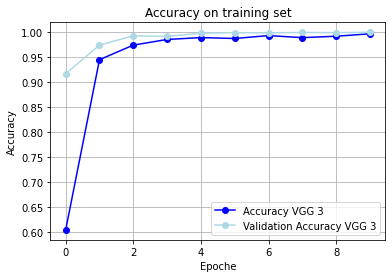

In [ ]:
plt.title("Accuracy on training set")
plt.grid()
plt.plot(interception_result.history['accuracy'], 'o-', color = 'blue', label = 'Accuracy VGG 3')
plt.plot(interception_result.history['val_accuracy'], 'o-', color = 'lightblue', label = 'Validation Accuracy VGG 3')
plt.legend()
plt.xlabel('Epoche')
plt.ylabel("Accuracy")
plt.show()

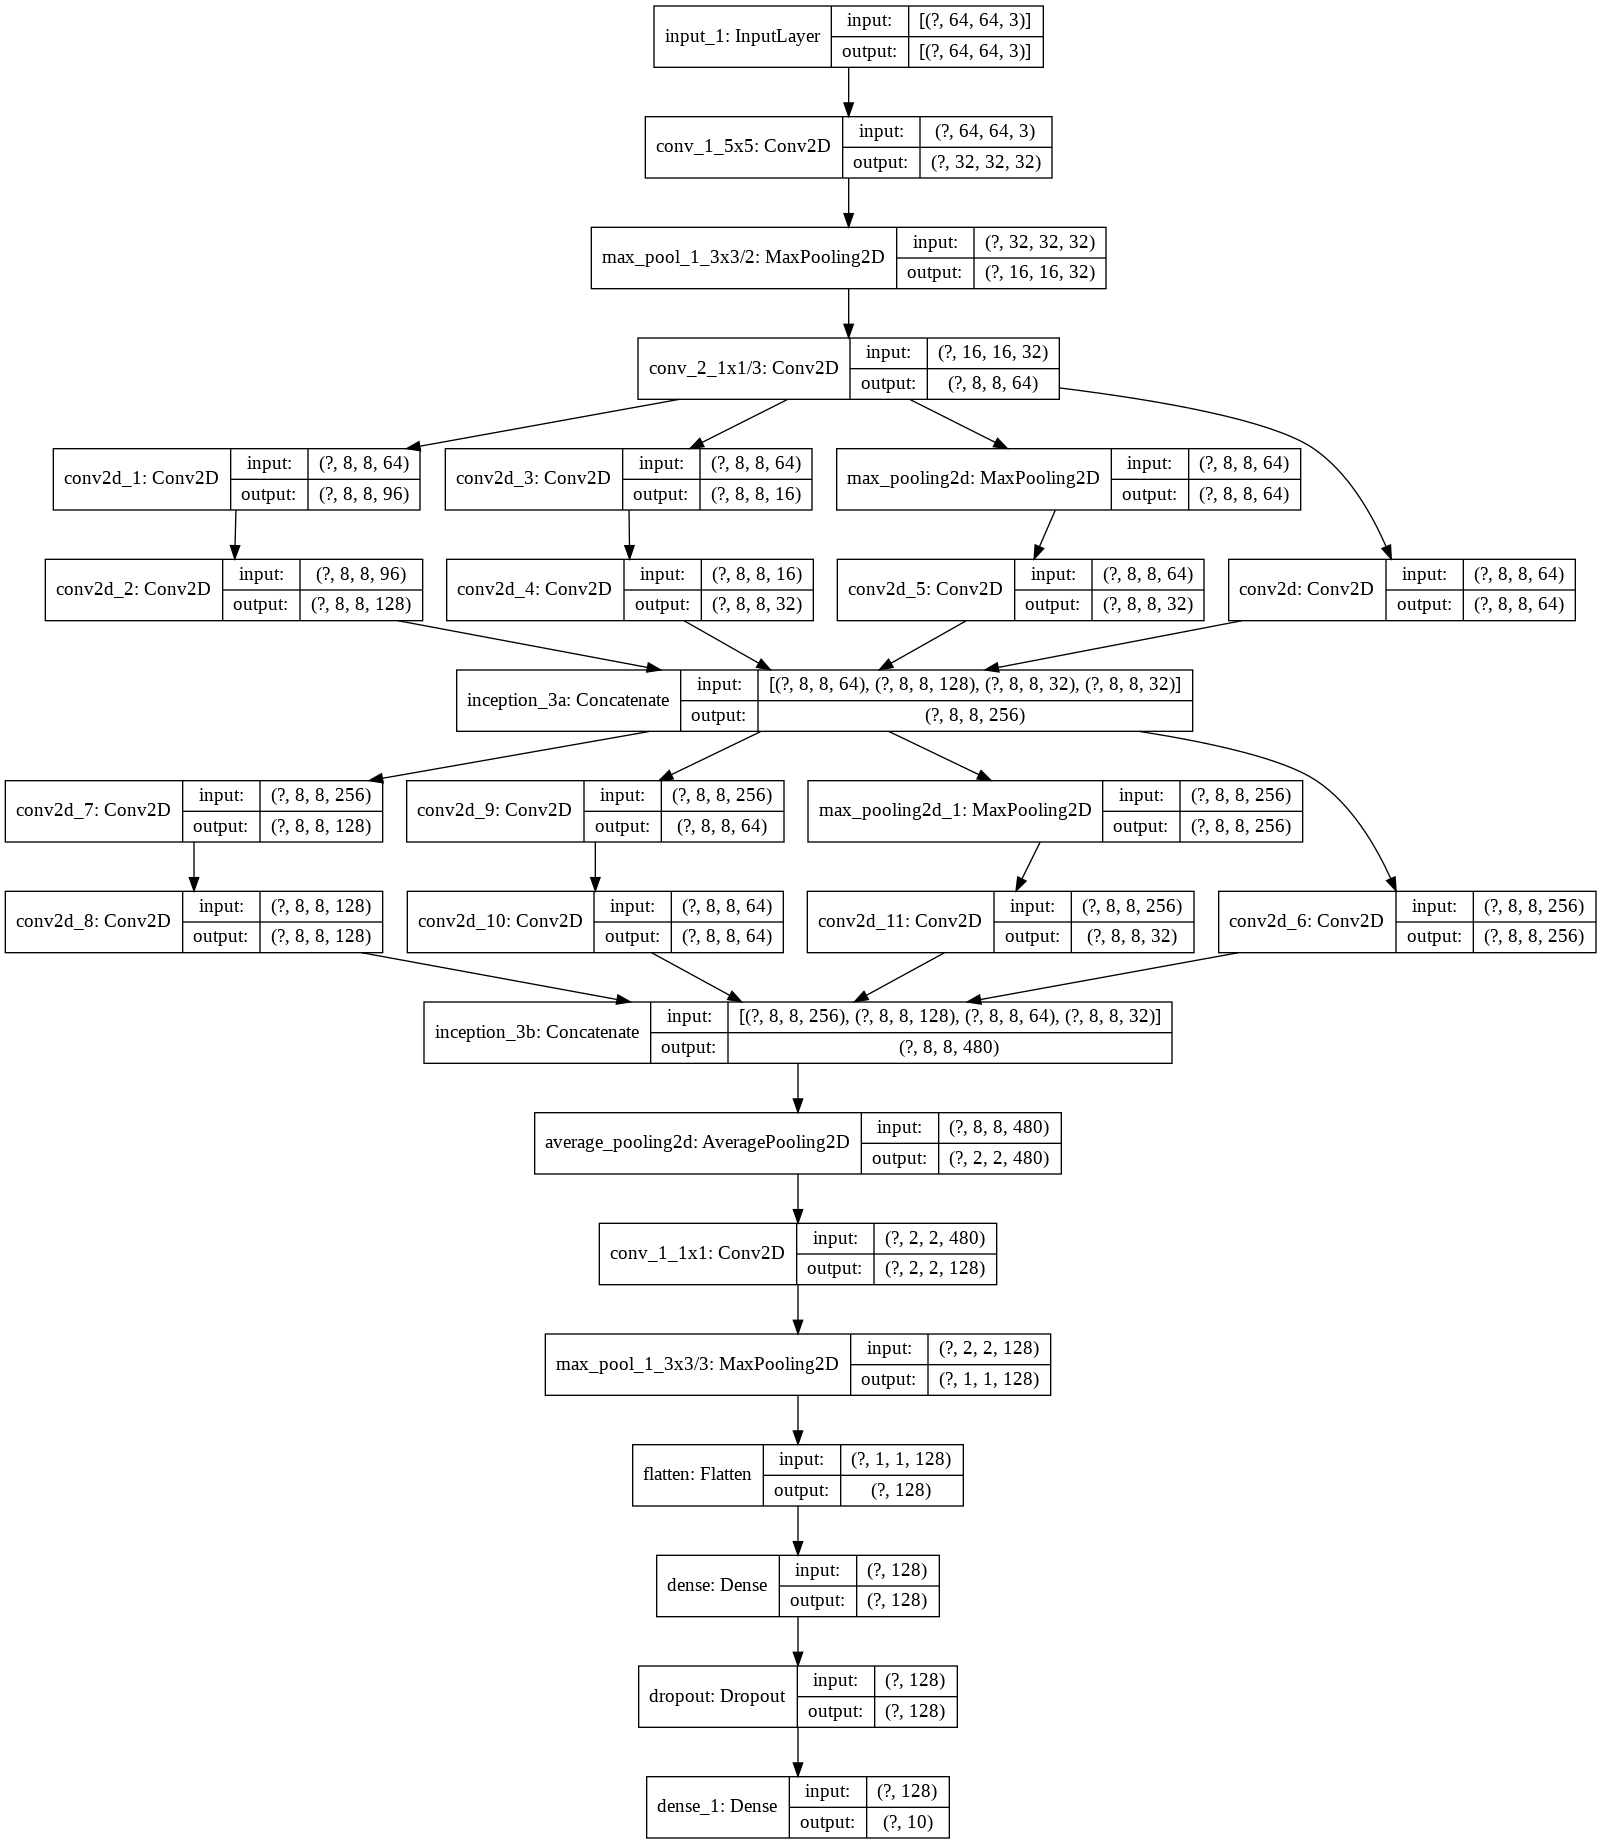

In [ ]:
tf.keras.utils.plot_model(model,to_file='v1.png', show_shapes=True, show_layer_names=True,)

### GoogLeNet dropout / batch normalization

In [ ]:
tf.keras.backend.clear_session()
x_input = tf.keras.Input(shape=(64, 64, 3))
x_2 = Conv2D(32, (5, 5), padding='same', strides=(2, 2), name='conv_1_5x5')(x_input)
x_2 = BatchNormalization()(x_2)
x_2 = Activation('relu')(x_2)

x_2 = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_1_3x3/2')(x_2)
x_2 = Dropout(0.2)(x_2)                     
x_2 = Conv2D(64, (1, 1), padding='same', strides=(2, 2), name='conv_2_1x1/3')(x_2)
x_2 = BatchNormalization()(x_2)
x_2 = Activation('relu')(x_2)

x_2 = inception_module(x_2,
                     filters_1x1=64,
                     filters_3x3_reduce=96,
                     filters_3x3=128,
                     filters_5x5_reduce=16,
                     filters_5x5=32,
                     filters_pool_proj=32,
                     name='inception_3a')

x_2 = inception_module(x_2,
                      filters_1x1=256,
                      filters_3x3_reduce=128,
                      filters_3x3=128,
                      filters_5x5_reduce=64,
                      filters_5x5=64,
                      filters_pool_proj=32,
                      name='inception_3b')
x_2 = AveragePooling2D((5, 5), strides=2)(x_2)
x_2 = Dropout(0.2)(x_2)

x_2 = Conv2D(128, (1, 1), padding='same', name='conv_1_1x1')(x_2)
x_2 = BatchNormalization()(x_2)
x_2 = Activation('relu')(x_2)

x_2 = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_1_3x3/3')(x_2)
x_2 = Dropout(0.2)(x_2)                       
x_2 = Flatten()(x_2)
x_2 = Dense(128, activation='relu')(x_2)
x_2 = Dropout(0.5)(x_2)
x_2 = Dense(10, activation='softmax')(x_2)

In [ ]:
model_2 = keras.Model(x_input, [x_2], name='inception_v1')

In [ ]:
model_2.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])
  
interception_result_2 = model_2.fit(X_train, y_train, epochs=10, validation_split = 0.2, validation_data= (X_train, y_train))

Epoch 1/10
816/816 [==============================] - 7s 9ms/step - loss: 0.7657 - accuracy: 0.7353 - val_loss: 0.2984 - val_accuracy: 0.8876
Epoch 2/10
816/816 [==============================] - 7s 8ms/step - loss: 0.1553 - accuracy: 0.9541 - val_loss: 0.4947 - val_accuracy: 0.8657
Epoch 3/10
816/816 [==============================] - 7s 8ms/step - loss: 0.0835 - accuracy: 0.9766 - val_loss: 0.0062 - val_accuracy: 0.9988
Epoch 4/10
816/816 [==============================] - 7s 8ms/step - loss: 0.0522 - accuracy: 0.9847 - val_loss: 0.0053 - val_accuracy: 0.9983
Epoch 5/10
816/816 [==============================] - 7s 8ms/step - loss: 0.0437 - accuracy: 0.9886 - val_loss: 0.0030 - val_accuracy: 0.9985
Epoch 6/10
816/816 [==============================] - 7s 8ms/step - loss: 0.0444 - accuracy: 0.9888 - val_loss: 0.0017 - val_accuracy: 0.9995
Epoch 7/10
816/816 [==============================] - 7s 8ms/step - loss: 0.0279 - accuracy: 0.9925 - val_loss: 0.0314 - val_accuracy: 0.9905
Epoch 

In [ ]:
y_pred = model_2.predict(X_test)
y_hat = y_test.numpy()
loss = zero_one(y_pred, y_hat)
np.round(loss, decimals = 4)

0.0097

In [ ]:
acc_interception = np.round(np.mean(interception_result_2.history['accuracy']), decimals = 4)
val_acc_interception = np.round(np.mean(interception_result_2.history['val_accuracy']), decimals = 4)
acc_interception, val_acc_interception

(0.9599, 0.973)

In [ ]:
rison Googl

### Comparison GoogLeNet

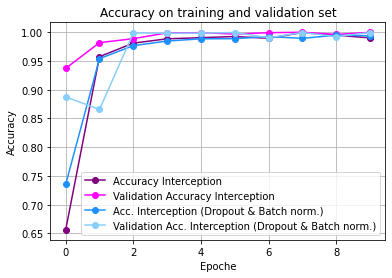

In [ ]:
plt.title("Accuracy on training and validation set")
plt.grid()
plt.plot(interception_result.history['accuracy'], 'o-', color = 'purple', label = 'Accuracy Interception')
plt.plot(interception_result.history['val_accuracy'], 'o-', color = 'magenta', label = 'Validation Accuracy Interception')
plt.plot(interception_result_2.history['accuracy'], 'o-', color = 'dodgerblue', label = 'Acc. Interception (Dropout & Batch norm.)')
plt.plot(interception_result_2.history['val_accuracy'], 'o-', color = 'lightskyblue', label = 'Validation Acc. Interception (Dropout & Batch norm.)')
plt.legend()
plt.xlabel('Epoche')
plt.ylabel("Accuracy")
plt.show()

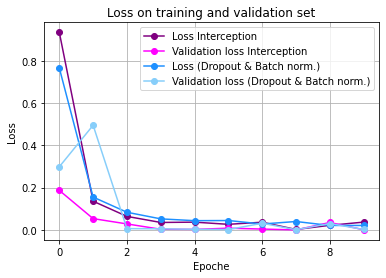

In [ ]:

plt.title("Loss on training and validation set")
plt.grid()
plt.plot(interception_result.history['loss'], 'o-', color = 'purple', label = 'Loss Interception')
plt.plot(interception_result.history['val_loss'], 'o-', color = 'magenta', label = 'Validation loss Interception')
plt.plot(interception_result_2.history['loss'], 'o-', color = 'dodgerblue', label = 'Loss (Dropout & Batch norm.)')
plt.plot(interception_result_2.history['val_loss'], 'o-', color = 'lightskyblue', label = 'Validation loss (Dropout & Batch norm.)')
plt.legend()
plt.xlabel('Epoche')
plt.ylabel("Loss")
plt.show()


# Result

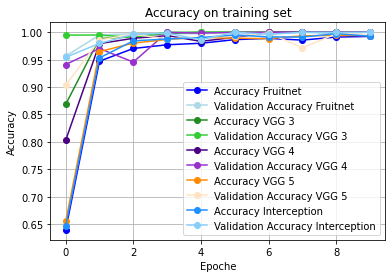

In [ ]:
plt.title("Accuracy on training set")
plt.grid()

plt.plot(fruit_net_result.history['accuracy'], 'o-', 
         color = 'blue', label = 'Accuracy Fruitnet')
plt.plot(fruit_net_result.history['val_accuracy'], 'o-', 
         color = 'lightblue', label = 'Validation Accuracy Fruitnet')

plt.plot(vgg_3_result.history['accuracy'], 'o-', 
         color = 'forestgreen', label = 'Accuracy VGG 3')
plt.plot(vgg_3_result.history['val_accuracy'], 'o-', 
         color = 'limegreen', label = 'Validation Accuracy VGG 3')

plt.plot(vgg_4_result.history['accuracy'], 'o-', 
         color = 'indigo', label = 'Accuracy VGG 4')
plt.plot(vgg_4_result.history['val_accuracy'], 'o-', 
         color = 'darkorchid', label = 'Validation Accuracy VGG 4')

plt.plot(vgg_5_result.history['accuracy'], 'o-', 
         color = 'darkorange', label = 'Accuracy VGG 5')
plt.plot(vgg_5_result.history['val_accuracy'], 'o-', 
         color = 'bisque', label = 'Validation Accuracy VGG 5')

plt.plot(interception_result.history['accuracy'], 'o-', 
         color = 'dodgerblue', label = 'Accuracy Interception')
plt.plot(interception_result.history['val_accuracy'], 'o-', 
         color = 'lightskyblue', label = 'Validation Accuracy Interception')

plt.legend()
plt.xlabel('Epoche')
plt.ylabel("Accuracy")
plt.show()

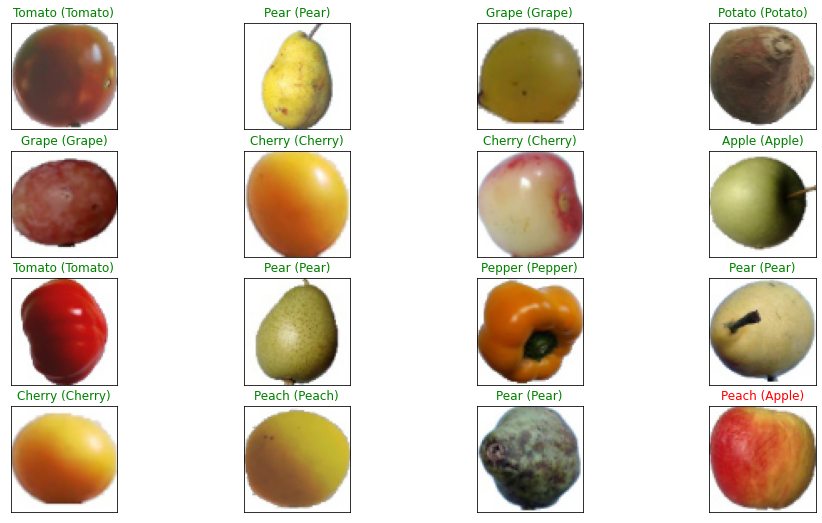

In [ ]:
# plot a random sample of test images, their predicted labels, and ground truth
class_names = ['Apple', 'Pear', 'Potato', 'Plum', 'Cherry',
               'Banana', 'Grape', 'Pepper', 'Tomato', 'Peach']
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(class_names[pred_idx], class_names[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

# Filter

In [ ]:
#filter for alexnet based architecture

In [ ]:
for layer in fruit_net.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)

conv2d (5, 5, 3, 16)
conv2d_1 (5, 5, 16, 32)
conv2d_2 (5, 5, 32, 64)
conv2d_3 (5, 5, 64, 128)


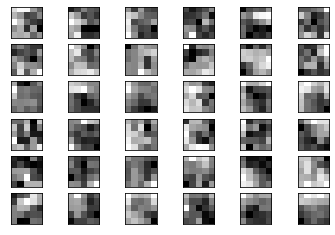

In [ ]:
filters, biases = fruit_net.layers[4].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(6):
		# specify subplot and turn of axis
		ax = plt.subplot(n_filters, 6, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

In [ ]:
filters.shape

(5, 5, 32, 64)

In [ ]:
#filters for vgg 3

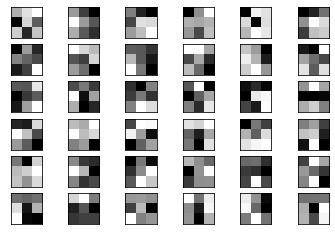

In [ ]:
filters, biases = vgg_3.layers[4].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(6):
		# specify subplot and turn of axis
		ax = plt.subplot(n_filters, 6, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

In [ ]:
activations = activation_model.predict(x)

In [ ]:
# first conv layer activation
first_conv_activation = activations[1]
print(first_conv_activation.shape)

(1, 16, 16, 32)


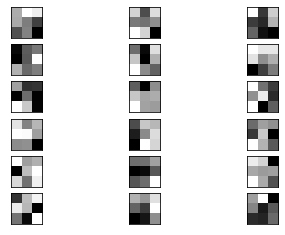

In [ ]:
filters, biases = vgg_3.layers[1].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = plt.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
plt.show()

In [ ]:
feature_maps.shape

(1, 32, 32, 32)

In [ ]:
v = feature_maps[0, :, :, 0]

In [ ]:
len(v)

32

In [ ]:
class_names = ['Apple', 'Pear', 'Potato', 'Plum', 'Cherry',
               'Banana', 'Grape', 'Pepper', 'Tomato', 'Peach']

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)>

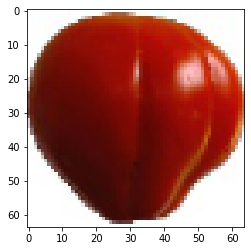

In [ ]:
plt.imshow(X_train[0])
class_names[3]
y_test[0]

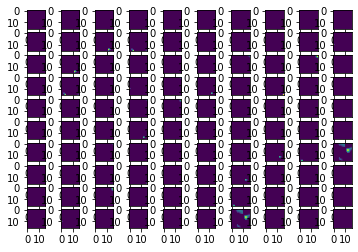

In [ ]:
#change .layers[].output to visualize different layers
#4
img = X_train[0]
cnn_viz = keras.Model(inputs=fruit_net.inputs, outputs=fruit_net.layers[5].output)
img = np.expand_dims(img, axis=0)
feature_maps = cnn_viz.predict(img)
#plt.imshow(feature_maps[0, :, :, 9])
n_column = 10
n_row = 10
ix =1
f, ax = plt.subplots(n_row, n_column)
for i in range(n_row):
  for j in range(n_column):
    k = j * i
    channel_image = feature_maps[0, :, :, k]
    ax[i, j].imshow(channel_image, cmap='viridis')

#plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

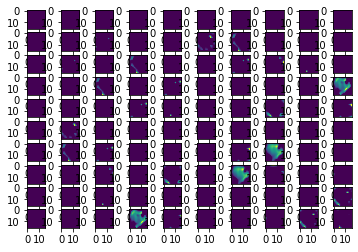

In [ ]:
#change .layers[].output to visualize different layers
#4
img = X_train[0]
cnn_viz = keras.Model(inputs=vgg_3.inputs, outputs=vgg_3.layers[7].output)
img = np.expand_dims(img, axis=0)
feature_maps = cnn_viz.predict(img)
#plt.imshow(feature_maps[0, :, :, 9])
n_column = 10
n_row = 10
ix =1
f, ax = plt.subplots(n_row, n_column)
for i in range(n_row):
  for j in range(n_column):
    k = j * i
    channel_image = feature_maps[0, :, :, k]
    ax[i, j].imshow(channel_image, cmap='viridis')

#plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

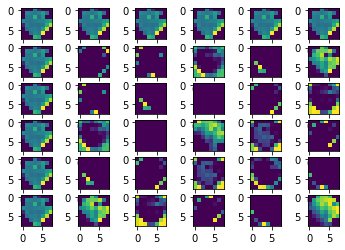

In [ ]:
#change .layers[].output to visualize different layers
#4
img = X_train[0]
cnn_viz = keras.Model(inputs=model.inputs, outputs=model.layers[11].output)
img = np.expand_dims(img, axis=0)
feature_maps = cnn_viz.predict(img)
#plt.imshow(feature_maps[0, :, :, 9])
n_column = 6
n_row = 6
ix =1
f, ax = plt.subplots(n_row, n_column)
for i in range(n_row):
  for j in range(n_column):
    k = j * i
    channel_image = feature_maps[0, :, :, k]
    ax[i, j].imshow(channel_image, cmap='viridis')

#plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

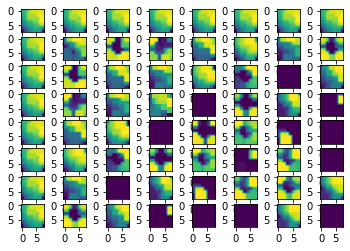

In [ ]:
img = X_train[0]
cnn_viz = keras.Model(inputs=model.inputs, outputs=model.layers[6].output)
img = np.expand_dims(img, axis=0)
feature_maps = cnn_viz.predict(img)
#plt.imshow(feature_maps[0, :, :, 9])
n_column = 8
n_row = 8
ix =1
f, ax = plt.subplots(n_row, n_column)
for i in range(n_row):
  for j in range(n_column):
    k = j * i
    channel_image = feature_maps[0, :, :, k]
    ax[i, j].imshow(channel_image, cmap='viridis')

#plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

In [ ]:
fruit_net.save('fruit_net')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: fruit_net/assets


In [ ]:
fruit_net_2.save('fruit_net_2')

INFO:tensorflow:Assets written to: fruit_net_2/assets


In [ ]:
vgg_3.save('vgg3')

INFO:tensorflow:Assets written to: vgg3/assets


In [ ]:
vgg_3_2.save('vgg3_2')

INFO:tensorflow:Assets written to: vgg3_2/assets


In [ ]:
vgg_4.save('vgg4')

INFO:tensorflow:Assets written to: vgg4/assets


In [ ]:
vgg_4_2.save('vgg4_2')

INFO:tensorflow:Assets written to: vgg4_2/assets


In [ ]:
model.save('intercept')

INFO:tensorflow:Assets written to: intercept/assets


In [ ]:
vgg_5.save('vgg5')

INFO:tensorflow:Assets written to: vgg5/assets


In [ ]:
vgg_5_2.save('vgg5_2')

INFO:tensorflow:Assets written to: vgg5_2/assets


In [ ]:
model_2.save('intercept2')

INFO:tensorflow:Assets written to: intercept2/assets
